# Creating and Backtesting Pivot Point Strategies

> The Pivot Point strategy is a technical analysis approach used in trading to __identify potential support and resistance levels__ __based on the previous day's high, low, and close prices__. Pivot Points are calculated using a formula that takes these prices into account. Traders use Pivot Points to determine potential price levels where the market might change direction.

__Calculation of Pivot Points:__

1. __Pivot Point (PP):__ 
    - $PP = \frac{\text{High + Low + Close}}{3}$
        - Its the avarage of High, Low, Close

2. __Support and Resistance Levels:__
    - __`Support 1 (S1)`:__
        - $S1 = 2 * PP - High$
    - __`Support 2 (S2)`:__
        - $S2 = PP - (High - Low)$
    - __`Resistance 1 (R1)`:__
        - $R1 = 2 * PP − Low$
    - __`Resistance 2 (R2)`:__
        - $R2 = PP + (High - Low)$

__Pivot Point Strategy:__

1. __Bullish Signal:__
    - > If the current market price is __above__ the __Pivot Point (PP)__, it may be considered a __bullish signal__.
    - > Traders may look for buying opportunities or expect an upward movement.
2. __Bearish Signal:__
    - > If the current market price is __below__ the __Pivot Point (PP)__, it may be considered a __bearish signal__.
    - > Traders may look for selling opportunities or expect a downward movement.
3. __Support and Resistance Levels:__
    - __Support Levels (S1 and S2):__
        - > These are potential levels where the price might find support during a downward movement. Traders may consider buying near these levels.
    - __Resistance Levels (R1 and R2):__
        - > These are potential levels where the price might face resistance during an upward movement. Traders may consider selling or taking profits near these levels.

---

# Getting the (raw) Data

The final goal of the data is:
1. __close/open/high/low__ price of the data itself (with frequenct of 30 min, like we have now)
2. __close/open/high/low__ of the __previes day__ (its use for understand Support Levels and Resistance Levels, and understend the "bounds or range" of the price.) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("../Data/EURUSD_pivot.csv", index_col = "time", parse_dates = ["time"])
data

# Pay attention:

# 1. The time series frequency have freqiency of helf hour (30 min).
# 2. we start with Open, High, Low, Close of each time point.

,Open,High,Low,Close
time,,,,
2019-01-01 22:00:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 22:30:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 23:00:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 23:30:00,1.14669,1.14672,1.14614,1.14614
2019-01-02 00:00:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 21:30:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 22:00:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 22:30:00,1.22958,1.22984,1.22945,1.22970


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24856 entries, 2019-01-01 22:00:00 to 2020-12-30 23:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24856 non-null  float64
 1   High    24856 non-null  float64
 2   Low     24856 non-null  float64
 3   Close   24856 non-null  float64
dtypes: float64(4)
memory usage: 970.9 KB


In [4]:
data.index

DatetimeIndex(['2019-01-01 22:00:00', '2019-01-01 22:30:00',
               '2019-01-01 23:00:00', '2019-01-01 23:30:00',
               '2019-01-02 00:00:00', '2019-01-02 00:30:00',
               '2019-01-02 01:00:00', '2019-01-02 01:30:00',
               '2019-01-02 02:00:00', '2019-01-02 02:30:00',
               ...
               '2020-12-30 19:00:00', '2020-12-30 19:30:00',
               '2020-12-30 20:00:00', '2020-12-30 20:30:00',
               '2020-12-30 21:00:00', '2020-12-30 21:30:00',
               '2020-12-30 22:00:00', '2020-12-30 22:30:00',
               '2020-12-30 23:00:00', '2020-12-30 23:30:00'],
              dtype='datetime64[ns]', name='time', length=24856, freq=None)

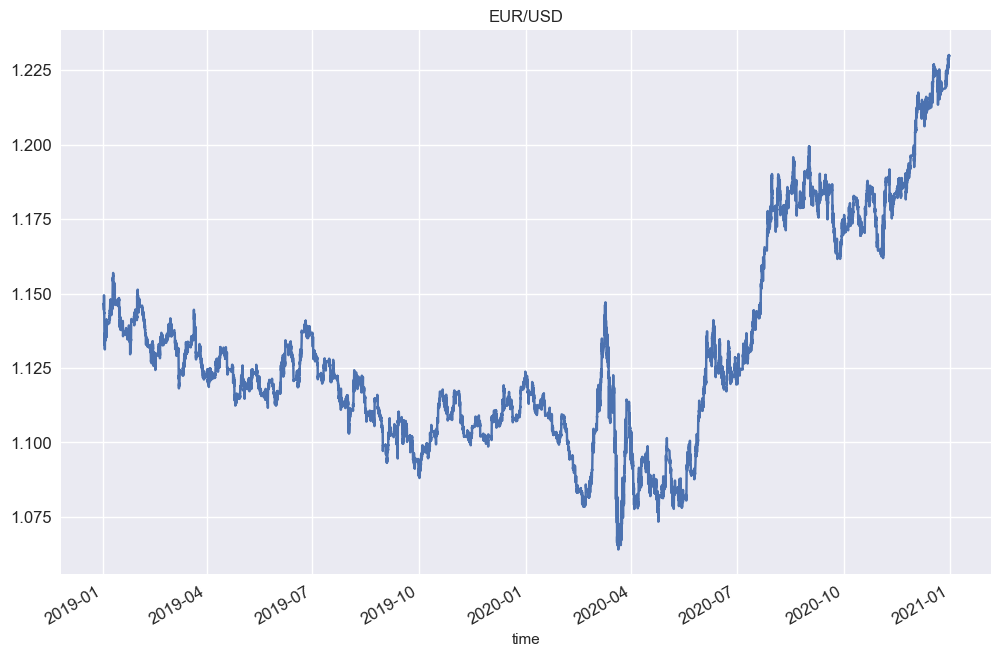

In [5]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

---

# Preparing the Data (1) - Timezone Conversion

In [6]:
data

,Open,High,Low,Close
time,,,,
2019-01-01 22:00:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 22:30:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 23:00:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 23:30:00,1.14669,1.14672,1.14614,1.14614
2019-01-02 00:00:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 21:30:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 22:00:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 22:30:00,1.22958,1.22984,1.22945,1.22970


In [7]:
# We can see that we dont have time zone.
# as part from prepare the data, we need specify a time zone.
print(data.index.tz)

None


In [8]:
# localize to UTC time
data = data.tz_localize("UTC") 
data

,Open,High,Low,Close
time,,,,
2019-01-01 22:00:00+00:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 22:30:00+00:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 23:00:00+00:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 23:30:00+00:00,1.14669,1.14672,1.14614,1.14614
2019-01-02 00:00:00+00:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 21:30:00+00:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 22:00:00+00:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 22:30:00+00:00,1.22958,1.22984,1.22945,1.22970


In [9]:
data.index

DatetimeIndex(['2019-01-01 22:00:00+00:00', '2019-01-01 22:30:00+00:00',
               '2019-01-01 23:00:00+00:00', '2019-01-01 23:30:00+00:00',
               '2019-01-02 00:00:00+00:00', '2019-01-02 00:30:00+00:00',
               '2019-01-02 01:00:00+00:00', '2019-01-02 01:30:00+00:00',
               '2019-01-02 02:00:00+00:00', '2019-01-02 02:30:00+00:00',
               ...
               '2020-12-30 19:00:00+00:00', '2020-12-30 19:30:00+00:00',
               '2020-12-30 20:00:00+00:00', '2020-12-30 20:30:00+00:00',
               '2020-12-30 21:00:00+00:00', '2020-12-30 21:30:00+00:00',
               '2020-12-30 22:00:00+00:00', '2020-12-30 22:30:00+00:00',
               '2020-12-30 23:00:00+00:00', '2020-12-30 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=24856, freq=None)

In [10]:
# convert to US/Eastern (NY) time
data = data.tz_convert("US/Eastern")
data

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 17:30:00-05:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 18:00:00-05:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 18:30:00-05:00,1.14669,1.14672,1.14614,1.14614
2019-01-01 19:00:00-05:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970


In [11]:
print(data.index.tz)

US/Eastern


---

# Preparing the Data (2) - Resampling to daily (NY Close)

In [12]:
close = data.Close.to_frame().copy()

In [13]:
close.head(15)

,Close
time,
2019-01-01 17:00:00-05:00,1.14648
2019-01-01 17:30:00-05:00,1.14641
2019-01-01 18:00:00-05:00,1.14665
2019-01-01 18:30:00-05:00,1.14614
2019-01-01 19:00:00-05:00,1.14582
2019-01-01 19:30:00-05:00,1.14565
2019-01-01 20:00:00-05:00,1.14524
2019-01-01 20:30:00-05:00,1.14523
2019-01-01 21:00:00-05:00,1.14485


In [14]:
close.resample("D").last()

,Close
time,
2019-01-01 00:00:00-05:00,1.14450
2019-01-02 00:00:00-05:00,1.13673
2019-01-03 00:00:00-05:00,1.13944
2019-01-04 00:00:00-05:00,1.13951
2019-01-05 00:00:00-05:00,NaN
...,...
2020-12-26 00:00:00-05:00,NaN
2020-12-27 00:00:00-05:00,1.22104
2020-12-28 00:00:00-05:00,1.22398


In [15]:
close.head(60)

,Close
time,
2019-01-01 17:00:00-05:00,1.14648
2019-01-01 17:30:00-05:00,1.14641
2019-01-01 18:00:00-05:00,1.14665
2019-01-01 18:30:00-05:00,1.14614
2019-01-01 19:00:00-05:00,1.14582
2019-01-01 19:30:00-05:00,1.14565
2019-01-01 20:00:00-05:00,1.14524
2019-01-01 20:30:00-05:00,1.14523
2019-01-01 21:00:00-05:00,1.14485


In [16]:
close.resample("D", offset = "17H").last().dropna()

,Close
time,
2019-01-01 17:00:00-05:00,1.13447
2019-01-02 17:00:00-05:00,1.13942
2019-01-03 17:00:00-05:00,1.13951
2019-01-06 17:00:00-05:00,1.14748
2019-01-07 17:00:00-05:00,1.14417
...,...
2020-12-23 17:00:00-05:00,1.21849
2020-12-27 17:00:00-05:00,1.22152
2020-12-28 17:00:00-05:00,1.22502


---

# Preparing the Data (3) - OHLC Resampling

In [17]:
data

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 17:30:00-05:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 18:00:00-05:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 18:30:00-05:00,1.14669,1.14672,1.14614,1.14614
2019-01-01 19:00:00-05:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970


In [18]:
agg_dict = {"Open":"first",
            "High":"max",
            "Low":"min",
            "Close":"last"
           }

In [19]:
# Where, we resample the data to day frequency, and extract the
# open, high, low, close,
data.resample("D", offset = "17H").agg(agg_dict).dropna()

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:00:00-05:00,1.13431,1.14112,1.13091,1.13942
2019-01-03 17:00:00-05:00,1.13930,1.14190,1.13458,1.13951
2019-01-06 17:00:00-05:00,1.13974,1.14827,1.13972,1.14748
2019-01-07 17:00:00-05:00,1.14773,1.14848,1.14219,1.14417
...,...,...,...,...
2020-12-23 17:00:00-05:00,1.21873,1.22158,1.21774,1.21849
2020-12-27 17:00:00-05:00,1.21892,1.22504,1.21812,1.22152
2020-12-28 17:00:00-05:00,1.22145,1.22752,1.22086,1.22502


In [20]:
# store and resample the frequency to Day
daily_data = data.resample("D", offset = "17H").agg(agg_dict).dropna()
daily_data

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:00:00-05:00,1.13431,1.14112,1.13091,1.13942
2019-01-03 17:00:00-05:00,1.13930,1.14190,1.13458,1.13951
2019-01-06 17:00:00-05:00,1.13974,1.14827,1.13972,1.14748
2019-01-07 17:00:00-05:00,1.14773,1.14848,1.14219,1.14417
...,...,...,...,...
2020-12-23 17:00:00-05:00,1.21873,1.22158,1.21774,1.21849
2020-12-27 17:00:00-05:00,1.21892,1.22504,1.21812,1.22152
2020-12-28 17:00:00-05:00,1.22145,1.22752,1.22086,1.22502


In [21]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2019-01-01 17:00:00-05:00 to 2020-12-30 17:00:00-05:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    520 non-null    float64
 1   High    520 non-null    float64
 2   Low     520 non-null    float64
 3   Close   520 non-null    float64
dtypes: float64(4)
memory usage: 20.3 KB


In [22]:
data

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 17:30:00-05:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 18:00:00-05:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 18:30:00-05:00,1.14669,1.14672,1.14614,1.14614
2019-01-01 19:00:00-05:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970


---

# Preparing the Data (4) - Merging Intraday and Daily Data

In [23]:
daily_data

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:00:00-05:00,1.13431,1.14112,1.13091,1.13942
2019-01-03 17:00:00-05:00,1.13930,1.14190,1.13458,1.13951
2019-01-06 17:00:00-05:00,1.13974,1.14827,1.13972,1.14748
2019-01-07 17:00:00-05:00,1.14773,1.14848,1.14219,1.14417
...,...,...,...,...
2020-12-23 17:00:00-05:00,1.21873,1.22158,1.21774,1.21849
2020-12-27 17:00:00-05:00,1.21892,1.22504,1.21812,1.22152
2020-12-28 17:00:00-05:00,1.22145,1.22752,1.22086,1.22502


In [24]:
daily_data.columns = ["Open_d", "High_d", "Low_d", "Close_d"]

In [25]:
daily_data

,Open_d,High_d,Low_d,Close_d
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:00:00-05:00,1.13431,1.14112,1.13091,1.13942
2019-01-03 17:00:00-05:00,1.13930,1.14190,1.13458,1.13951
2019-01-06 17:00:00-05:00,1.13974,1.14827,1.13972,1.14748
2019-01-07 17:00:00-05:00,1.14773,1.14848,1.14219,1.14417
...,...,...,...,...
2020-12-23 17:00:00-05:00,1.21873,1.22158,1.21774,1.21849
2020-12-27 17:00:00-05:00,1.21892,1.22504,1.21812,1.22152
2020-12-28 17:00:00-05:00,1.22145,1.22752,1.22086,1.22502


In [26]:
data

,Open,High,Low,Close
time,,,,
2019-01-01 17:00:00-05:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 17:30:00-05:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 18:00:00-05:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 18:30:00-05:00,1.14669,1.14672,1.14614,1.14614
2019-01-01 19:00:00-05:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970


In [27]:
daily_data.shift().dropna()

,Open_d,High_d,Low_d,Close_d
time,,,,
2019-01-02 17:00:00-05:00,1.14649,1.14970,1.13250,1.13447
2019-01-03 17:00:00-05:00,1.13431,1.14112,1.13091,1.13942
2019-01-06 17:00:00-05:00,1.13930,1.14190,1.13458,1.13951
2019-01-07 17:00:00-05:00,1.13974,1.14827,1.13972,1.14748
2019-01-08 17:00:00-05:00,1.14773,1.14848,1.14219,1.14417
...,...,...,...,...
2020-12-23 17:00:00-05:00,1.21630,1.22211,1.21541,1.21856
2020-12-27 17:00:00-05:00,1.21873,1.22158,1.21774,1.21849
2020-12-28 17:00:00-05:00,1.21892,1.22504,1.21812,1.22152


In [28]:
pd.concat([data, daily_data.shift().dropna()], axis = 1).ffill().dropna().head(60)

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d
time,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:30:00-05:00,1.13418,1.13468,1.13372,1.13398,1.14649,1.14970,1.13250,1.13447
2019-01-02 20:00:00-05:00,1.13402,1.13482,1.13399,1.13482,1.14649,1.14970,1.13250,1.13447
2019-01-02 20:30:00-05:00,1.13481,1.13526,1.13432,1.13484,1.14649,1.14970,1.13250,1.13447
2019-01-02 21:00:00-05:00,1.13481,1.13552,1.13462,1.13551,1.14649,1.14970,1.13250,1.13447


In [29]:
# This is the final version that we need for Pivot strategy:
# The data in freq of 30 min.
# we have the open/high/low/close of the 30min freq. 
# we have the open/high/low/close of the previos day. 

data = pd.concat([data, daily_data.shift().dropna()], axis = 1).ffill().dropna()

In [30]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d
time,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447
...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24812 entries, 2019-01-02 17:00:00-05:00 to 2020-12-30 18:30:00-05:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     24812 non-null  float64
 1   High     24812 non-null  float64
 2   Low      24812 non-null  float64
 3   Close    24812 non-null  float64
 4   Open_d   24812 non-null  float64
 5   High_d   24812 non-null  float64
 6   Low_d    24812 non-null  float64
 7   Close_d  24812 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


---

# Pivot Point - Overview and Data requirements

In [32]:
data # already prepared

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d
time,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447
...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000


In [33]:
data.index # New York time / US Eastern

DatetimeIndex(['2019-01-02 17:00:00-05:00', '2019-01-02 17:30:00-05:00',
               '2019-01-02 18:00:00-05:00', '2019-01-02 18:30:00-05:00',
               '2019-01-02 19:00:00-05:00', '2019-01-02 19:30:00-05:00',
               '2019-01-02 20:00:00-05:00', '2019-01-02 20:30:00-05:00',
               '2019-01-02 21:00:00-05:00', '2019-01-02 21:30:00-05:00',
               ...
               '2020-12-30 14:00:00-05:00', '2020-12-30 14:30:00-05:00',
               '2020-12-30 15:00:00-05:00', '2020-12-30 15:30:00-05:00',
               '2020-12-30 16:00:00-05:00', '2020-12-30 16:30:00-05:00',
               '2020-12-30 17:00:00-05:00', '2020-12-30 17:30:00-05:00',
               '2020-12-30 18:00:00-05:00', '2020-12-30 18:30:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', name='time', length=24812, freq=None)

- Currencies trade 24h / 5 days -> from Sunday 5pm (__US Eastern__) to Friday 5pm
- Close is at __5pm__ US Eastern

- Pivot Point is an __Intraday__ Price Action Strategy
- It uses (Open), High, Low and Close Prices of the __previous day__

In [34]:
data.head(60)

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d
time,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:30:00-05:00,1.13418,1.13468,1.13372,1.13398,1.14649,1.14970,1.13250,1.13447
2019-01-02 20:00:00-05:00,1.13402,1.13482,1.13399,1.13482,1.14649,1.14970,1.13250,1.13447
2019-01-02 20:30:00-05:00,1.13481,1.13526,1.13432,1.13484,1.14649,1.14970,1.13250,1.13447
2019-01-02 21:00:00-05:00,1.13481,1.13552,1.13462,1.13551,1.14649,1.14970,1.13250,1.13447


---

# Adding Pivot Point and Support and Resistance Lines

In [35]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d
time,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447
...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000


__Pivot Point Line__: The average of the previous day´s High, Low and Close price

In [36]:
data["PP"] = (data.High_d + data.Low_d + data.Close_d) / 3
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP
time,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890
...,...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000,1.228657


__S1 and S2 Support Lines__

>  the S1 and S2 __Support Lines__ in a Pivot Point strategy represent __potential levels where the price might find support during a downward movement__

In [37]:
data["S1"] = data.PP * 2 - data.High_d

In [38]:
data["S2"] = data.PP - (data.High_d - data.Low_d )

In [39]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP,S1,S2
time,,,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,1.217807
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587


__R1 and R2 Resistance Lines__

> the R1 and R2 Resistance Lines in a Pivot Point strategy represent potential levels where the price might face resistance during an upward movement

In [40]:
data["R1"] = data.PP * 2 - data.Low_d

In [41]:
data["R2"] = data.PP + (data.High_d - data.Low_d )

In [42]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP,S1,S2,R1,R2
time,,,,,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,1.217807,1.228073,1.231127
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727


__Interpretation__

- I the middle, we have the pivot point (the avarage of close/low/high) 
- __above the middle__, we have the __Resistance lines (`R1 R2`)__
- __Below the middle__, we have the __Support Lines (`S1 S2`)__

We can see that the price fluctiontion between those limits. 

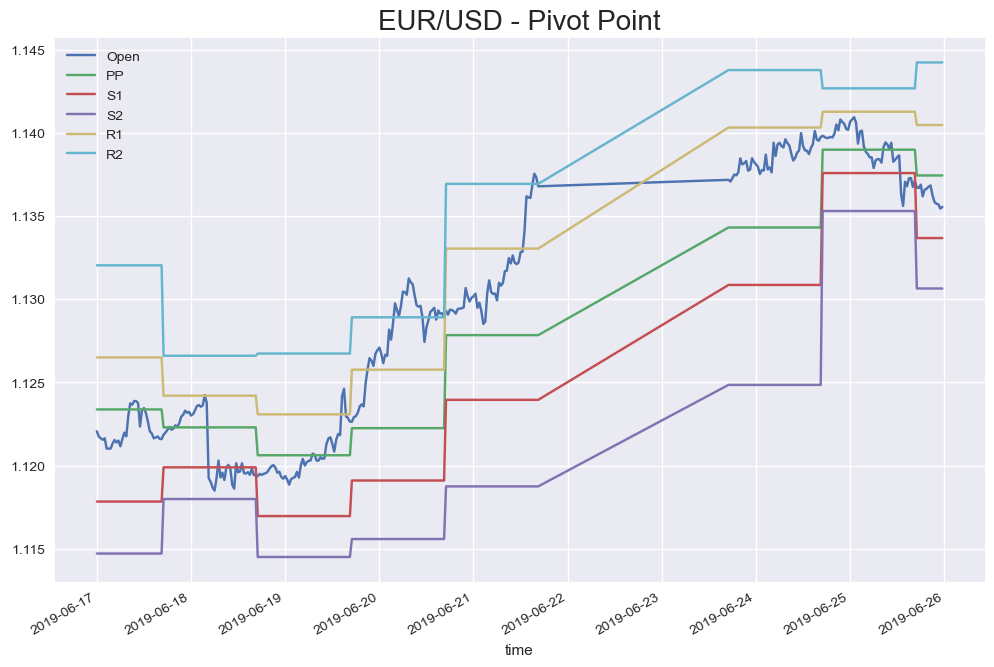

In [43]:
data.loc["2019-06-17":"2019-06-25", ["Open", "PP", "S1", "S2", "R1", "R2"]].plot(figsize = (12, 8))
plt.title("EUR/USD - Pivot Point", fontsize = 20)
plt.show()

---

# Defining a simple Pivot Point Strategy

> Note! there are lot's of way's to interpret the pivot strategy as well. this is the most simple ans poor strategy, but its just for ilustration how its work. 

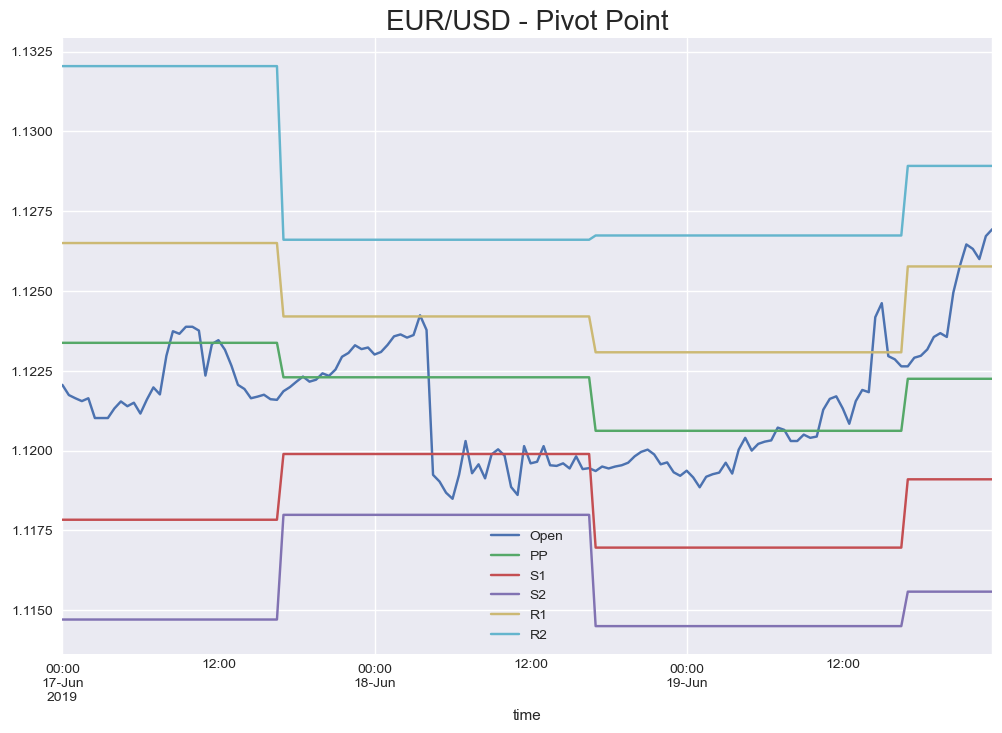

In [44]:
data.loc["2019-06-17":"2019-06-19", ["Open", "PP", "S1", "S2", "R1", "R2"]].plot(figsize = (12, 8))
plt.title("EUR/USD - Pivot Point", fontsize = 20)
plt.show()

__There is not the one Pivot Point Strategy that is set in stone__. <br>
Working with Price Action and Support and Resistance Lines is __highly subjective__ and __case specific__. <br>
Subject to __human__ intuition, judgement and experience -> Can be used for Algorithmic Trading?  

But, the consensus is that 
- a __price above PP__ signals __bullish__ sentiment -> go long
- a __price below PP__ signals __bearish__ sentiment -> go short

__Example: S1/R1 signal end of trend as probability of reversal increases (exit points)__

- If the price reaches S1 -> go neutral
- If the price reaches R1 -> go neutral

In [45]:
# 1.
# If the open price cross up the pivot point, its can be
# signal to buy (1). 
# else, signal to sell (-1) 
data["position"] = np.where(data.Open > data.PP, 1, -1)

In [46]:
# 2. If the open price bigger than R1, we go nutral. else - we stay at the pos.
# why? its mean that we sell the stock.
# (we buy the stock on the pivot point, and sell at the resident.)
data["position"] = np.where(data.Open >= data.R1, 0, data.position)

In [47]:
# 3. if open price smaller than suppurt, we want to go nutral.
# why? its mean that we by back the stock.
#  (we sell the stock on the pivot point, and buy back on the suppurt.) 
data["position"] = np.where(data.Open <= data.S1, 0, data.position)

In [48]:
# 4. else, keep nutral
data.position = data.position.fillna(0)

In [49]:
data.position.value_counts()

position
 1    10034
-1    10030
 0     4748
Name: count, dtype: int64

---

# Vectorized Strategy Backtesting

In [50]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP,S1,S2,R1,R2,position
time,,,,,,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,1.217807,1.228073,1.231127,0
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727,1
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727,1


In [51]:
data.Open.shift(-1)

time
2019-01-02 17:00:00-05:00    1.13343
2019-01-02 17:30:00-05:00    1.13471
2019-01-02 18:00:00-05:00    1.13406
2019-01-02 18:30:00-05:00    1.13122
2019-01-02 19:00:00-05:00    1.13418
                              ...   
2020-12-30 16:30:00-05:00    1.22979
2020-12-30 17:00:00-05:00    1.22958
2020-12-30 17:30:00-05:00    1.22974
2020-12-30 18:00:00-05:00    1.23014
2020-12-30 18:30:00-05:00        NaN
Name: Open, Length: 24812, dtype: float64

In [52]:
data["returns"] = np.log(data.Open.shift(-1).div(data.Open))

In [53]:
data["strategy"] = data.position * data["returns"]

In [54]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP,S1,S2,R1,R2,position,returns,strategy
time,,,,,,,,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,-0.000776,0.000776
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,0.001129,-0.001129
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,-0.000573,0.000573
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,-0.002507,0.002507
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,0.002613,-0.002613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,1.217807,1.228073,1.231127,0,0.000260,0.000000
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727,1,-0.000171,-0.000171
2020-12-30 17:30:00-05:00,1.22958,1.22984,1.22945,1.22970,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727,1,0.000130,0.000130


In [55]:
data.dropna(inplace = True)

In [56]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP,S1,S2,R1,R2,position,returns,strategy
time,,,,,,,,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,-0.000776,0.000776
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,0.001129,-0.001129
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,-0.000573,0.000573
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,-0.002507,0.002507
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,1.121690,1.145280,1.156090,-1,0.002613,-0.002613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 16:00:00-05:00,1.22918,1.22988,1.22911,1.22947,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,1.217807,1.228073,1.231127,0,0.000236,0.000000
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,1.217807,1.228073,1.231127,0,0.000260,0.000000
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,1.222587,1.232363,1.234727,1,-0.000171,-0.000171


In [57]:
ptc = 0.00007

In [58]:
data["trades"] = data.position.diff().fillna(0).abs()

In [59]:
data.trades.value_counts()

trades
0.0    21926
2.0     1497
1.0     1388
Name: count, dtype: int64

In [60]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [61]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [62]:
data

,Open,High,Low,Close,Open_d,High_d,Low_d,Close_d,PP,S1,...,R1,R2,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 17:00:00-05:00,1.13431,1.13471,1.13336,1.13352,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,...,1.145280,1.156090,-1,-0.000776,0.000776,0.0,0.000776,0.999224,1.000776,1.000776
2019-01-02 17:30:00-05:00,1.13343,1.13386,1.13101,1.13303,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,...,1.145280,1.156090,-1,0.001129,-0.001129,0.0,-0.001129,1.000353,0.999647,0.999647
2019-01-02 18:00:00-05:00,1.13471,1.13522,1.13330,1.13402,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,...,1.145280,1.156090,-1,-0.000573,0.000573,0.0,0.000573,0.999780,1.000220,1.000220
2019-01-02 18:30:00-05:00,1.13406,1.13446,1.13091,1.13125,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,...,1.145280,1.156090,-1,-0.002507,0.002507,0.0,0.002507,0.997276,1.002732,1.002732
2019-01-02 19:00:00-05:00,1.13122,1.13426,1.13098,1.13418,1.14649,1.14970,1.13250,1.13447,1.138890,1.128080,...,1.145280,1.156090,-1,0.002613,-0.002613,0.0,-0.002613,0.999885,1.000115,1.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 16:00:00-05:00,1.22918,1.22988,1.22911,1.22947,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,...,1.228073,1.231127,0,0.000236,0.000000,0.0,0.000000,1.083892,1.020969,0.751324
2020-12-30 16:30:00-05:00,1.22947,1.23019,1.22946,1.23000,1.22145,1.22752,1.22086,1.22502,1.224467,1.221413,...,1.228073,1.231127,0,0.000260,0.000000,0.0,0.000000,1.084175,1.020969,0.751324
2020-12-30 17:00:00-05:00,1.22979,1.23000,1.22935,1.22956,1.22508,1.23102,1.22495,1.23000,1.228657,1.226293,...,1.232363,1.234727,1,-0.000171,-0.000171,1.0,-0.000241,1.083989,1.020795,0.751144


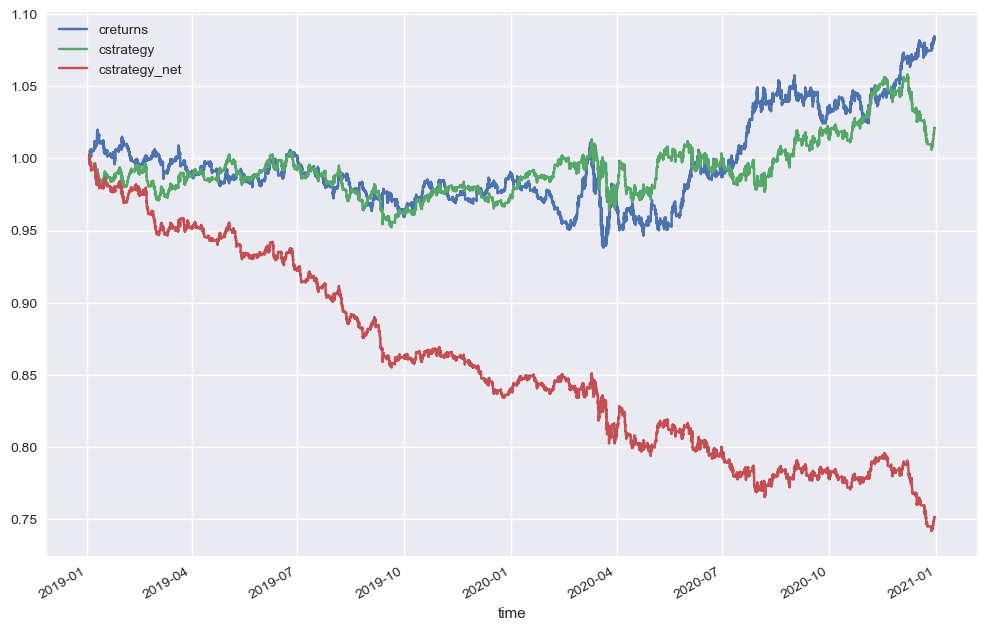

In [63]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

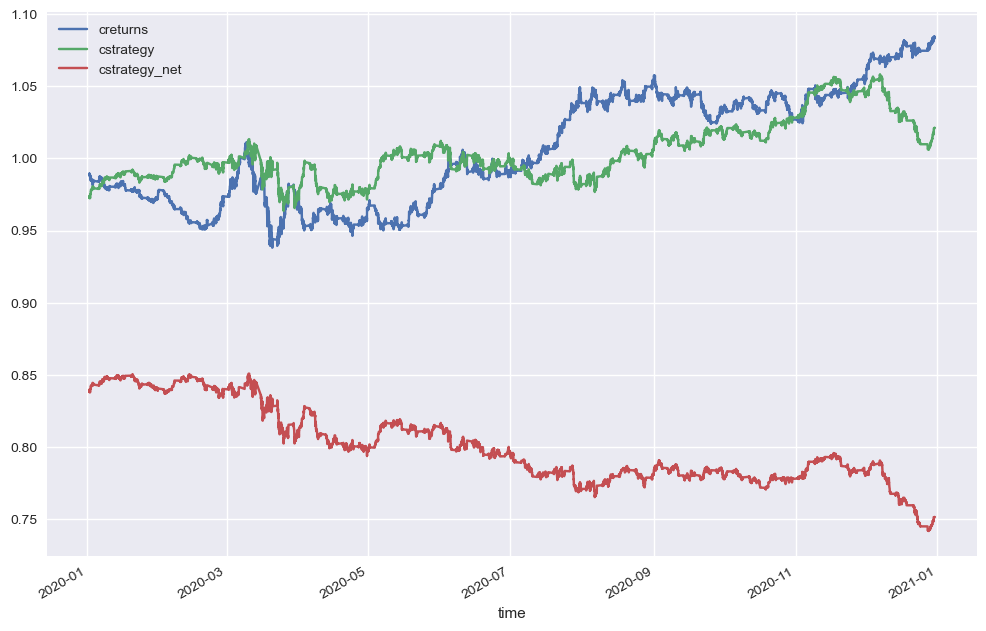

In [64]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()